In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import KNNImputer
from sklearn.cluster import KMeans

df = pd.read_csv('amazonFilms.csv')
values1 = 'NoName'
values2 = 'NoRate'
values3 = 2000
df['MPAA_Rating'] = df['MPAA_Rating'].fillna(value=values2)
df['Starring'] = df['Starring'].fillna(value=values1)
df['Directed_By'] = df['Directed_By'].fillna(value=values1)
df['Price'] = df['Price'].fillna(0)
df['ReleaseYear'] = df['ReleaseYear'].fillna(value=values3)
df.head()

,Unnamed: 0,title,Movie_Rating,No_of_Ratings,Format,ReleaseYear,MPAA_Rating,Directed_By,Starring,Price
0,0,Totally Killer,4.3,323,Prime Video,2023.0,R,Nahnatchka Khan,"Kiernan Shipka,Olivia Holt,Julie Bowen",0.00
1,1,Guy Ritchie's The Covenant,4.7,13268,Prime Video,2023.0,R,Guy Ritchie,"Jake Gyllenhaal,Dar Salim,Antony Starr",5.99
2,2,A Million Miles Away,4.9,1126,Prime Video,2023.0,PG,Alejandra Márquez Abella,"Michael Peña,Rosa Salazar",0.00
3,3,Kelce,5.0,570,Prime Video,2023.0,NoRate,Don Argott,"Jason Kelce,Travis Kelce,Kylie Kelce,Connor Ba...",0.00
4,4,Despicable Me 3,4.8,31813,Prime Video,2017.0,PG,"Pierre Coffin,Kyle Balda","Steve Carell,Kristen Wiig,Trey Parker",0.00


Добавляем новый атрибут

In [2]:
df['Sum'] = df['No_of_Ratings'] * df['Price']
df

,Unnamed: 0,title,Movie_Rating,No_of_Ratings,Format,ReleaseYear,MPAA_Rating,Directed_By,Starring,Price,Sum
0,0,Totally Killer,4.3,323,Prime Video,2023.0,R,Nahnatchka Khan,"Kiernan Shipka,Olivia Holt,Julie Bowen",0.00,0.00
1,1,Guy Ritchie's The Covenant,4.7,13268,Prime Video,2023.0,R,Guy Ritchie,"Jake Gyllenhaal,Dar Salim,Antony Starr",5.99,79475.32
2,2,A Million Miles Away,4.9,1126,Prime Video,2023.0,PG,Alejandra Márquez Abella,"Michael Peña,Rosa Salazar",0.00,0.00
3,3,Kelce,5.0,570,Prime Video,2023.0,NoRate,Don Argott,"Jason Kelce,Travis Kelce,Kylie Kelce,Connor Ba...",0.00,0.00
4,4,Despicable Me 3,4.8,31813,Prime Video,2017.0,PG,"Pierre Coffin,Kyle Balda","Steve Carell,Kristen Wiig,Trey Parker",0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...
2103,2112,Nelly & Nadine,4.8,30,Prime Video,2023.0,NoRate,Magnus Gertten,"Nelly Mousset-Vos,Nadine Hwang,Anne Bianchi",2.99,89.70
2104,2113,Lethal Legacy,5.0,2,Prime Video,2023.0,NoRate,Joe Carroll,"Brittany Inge,Nathan Owens,James Black,Dorian ...",0.00,0.00
2105,2114,Moana (Bonus Content),4.8,26335,Prime Video,2016.0,PG,"Ron Clements,John Musker","Auli'i Cravalho,Dwayne Johnson,Rachel House",9.99,263086.65
2106,2115,Honey Boy,4.4,1338,Prime Video,2019.0,R,Alma Har’el,"Shia LaBeouf,Lucas Hedges,Noah Jupe,FKA twigs",0.00,0.00


In [3]:
df[df.duplicated()]

,Unnamed: 0,title,Movie_Rating,No_of_Ratings,Format,ReleaseYear,MPAA_Rating,Directed_By,Starring,Price,Sum


Дублей нет

In [4]:
df.isna().sum()

Unnamed: 0       0
title            0
Movie_Rating     0
No_of_Ratings    0
Format           0
ReleaseYear      0
MPAA_Rating      0
Directed_By      0
Starring         0
Price            0
Sum              0
dtype: int64

Пропущенных значений нет

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2108 entries, 0 to 2107
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     2108 non-null   int64  
 1   title          2108 non-null   object 
 2   Movie_Rating   2108 non-null   float64
 3   No_of_Ratings  2108 non-null   int64  
 4   Format         2108 non-null   object 
 5   ReleaseYear    2108 non-null   float64
 6   MPAA_Rating    2108 non-null   object 
 7   Directed_By    2108 non-null   object 
 8   Starring       2108 non-null   object 
 9   Price          2108 non-null   float64
 10  Sum            2108 non-null   float64
dtypes: float64(4), int64(2), object(5)
memory usage: 181.3+ KB


In [6]:
df_num = df.select_dtypes(exclude=['object'])
df_num.head(10)

,Unnamed: 0,Movie_Rating,No_of_Ratings,ReleaseYear,Price,Sum
0,0,4.3,323,2023.0,0.00,0.00
1,1,4.7,13268,2023.0,5.99,79475.32
2,2,4.9,1126,2023.0,0.00,0.00
3,3,5.0,570,2023.0,0.00,0.00
4,4,4.8,31813,2017.0,0.00,0.00
5,5,4.3,7403,2021.0,3.79,28057.37
6,6,4.1,9259,2023.0,5.99,55461.41
7,7,4.8,52086,2009.0,0.00,0.00
8,8,4.2,22762,2022.0,3.79,86267.98
9,9,4.5,1317,2023.0,5.89,7757.13


In [7]:
df_std = pd.DataFrame()
for col in df_num.columns:
  m = df_num[col].mean()
  s = df_num[col].std()
  df_std[col + '_B'] = (df_num[col] - m)/s
df_std.head(10)

,Unnamed: 0_B,Movie_Rating_B,No_of_Ratings_B,ReleaseYear_B,Price_B,Sum_B
0,-1.726236,-0.721525,-0.480767,1.016684,-0.442131,-0.154532
1,-1.724603,0.841254,0.320410,1.016684,0.701033,0.188179
2,-1.722970,1.622643,-0.431069,1.016684,-0.442131,-0.154532
3,-1.721338,2.013338,-0.465480,1.016684,-0.442131,-0.154532
4,-1.719705,1.231949,1.468176,0.608707,-0.442131,-0.154532
5,-1.718072,-0.721525,-0.042580,0.880692,0.281173,-0.033544
6,-1.716440,-1.502914,0.072290,1.016684,0.701033,0.084627
7,-1.714807,1.231949,2.722889,0.064738,-0.442131,-0.154532
8,-1.713174,-1.112220,0.908002,0.948688,0.281173,0.217470
9,-1.711541,0.059865,-0.419248,1.016684,0.681949,-0.121082


C:\Users\Leo\AppData\Local\Temp\ipykernel_21540\1300122785.py:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(df_std.columns)


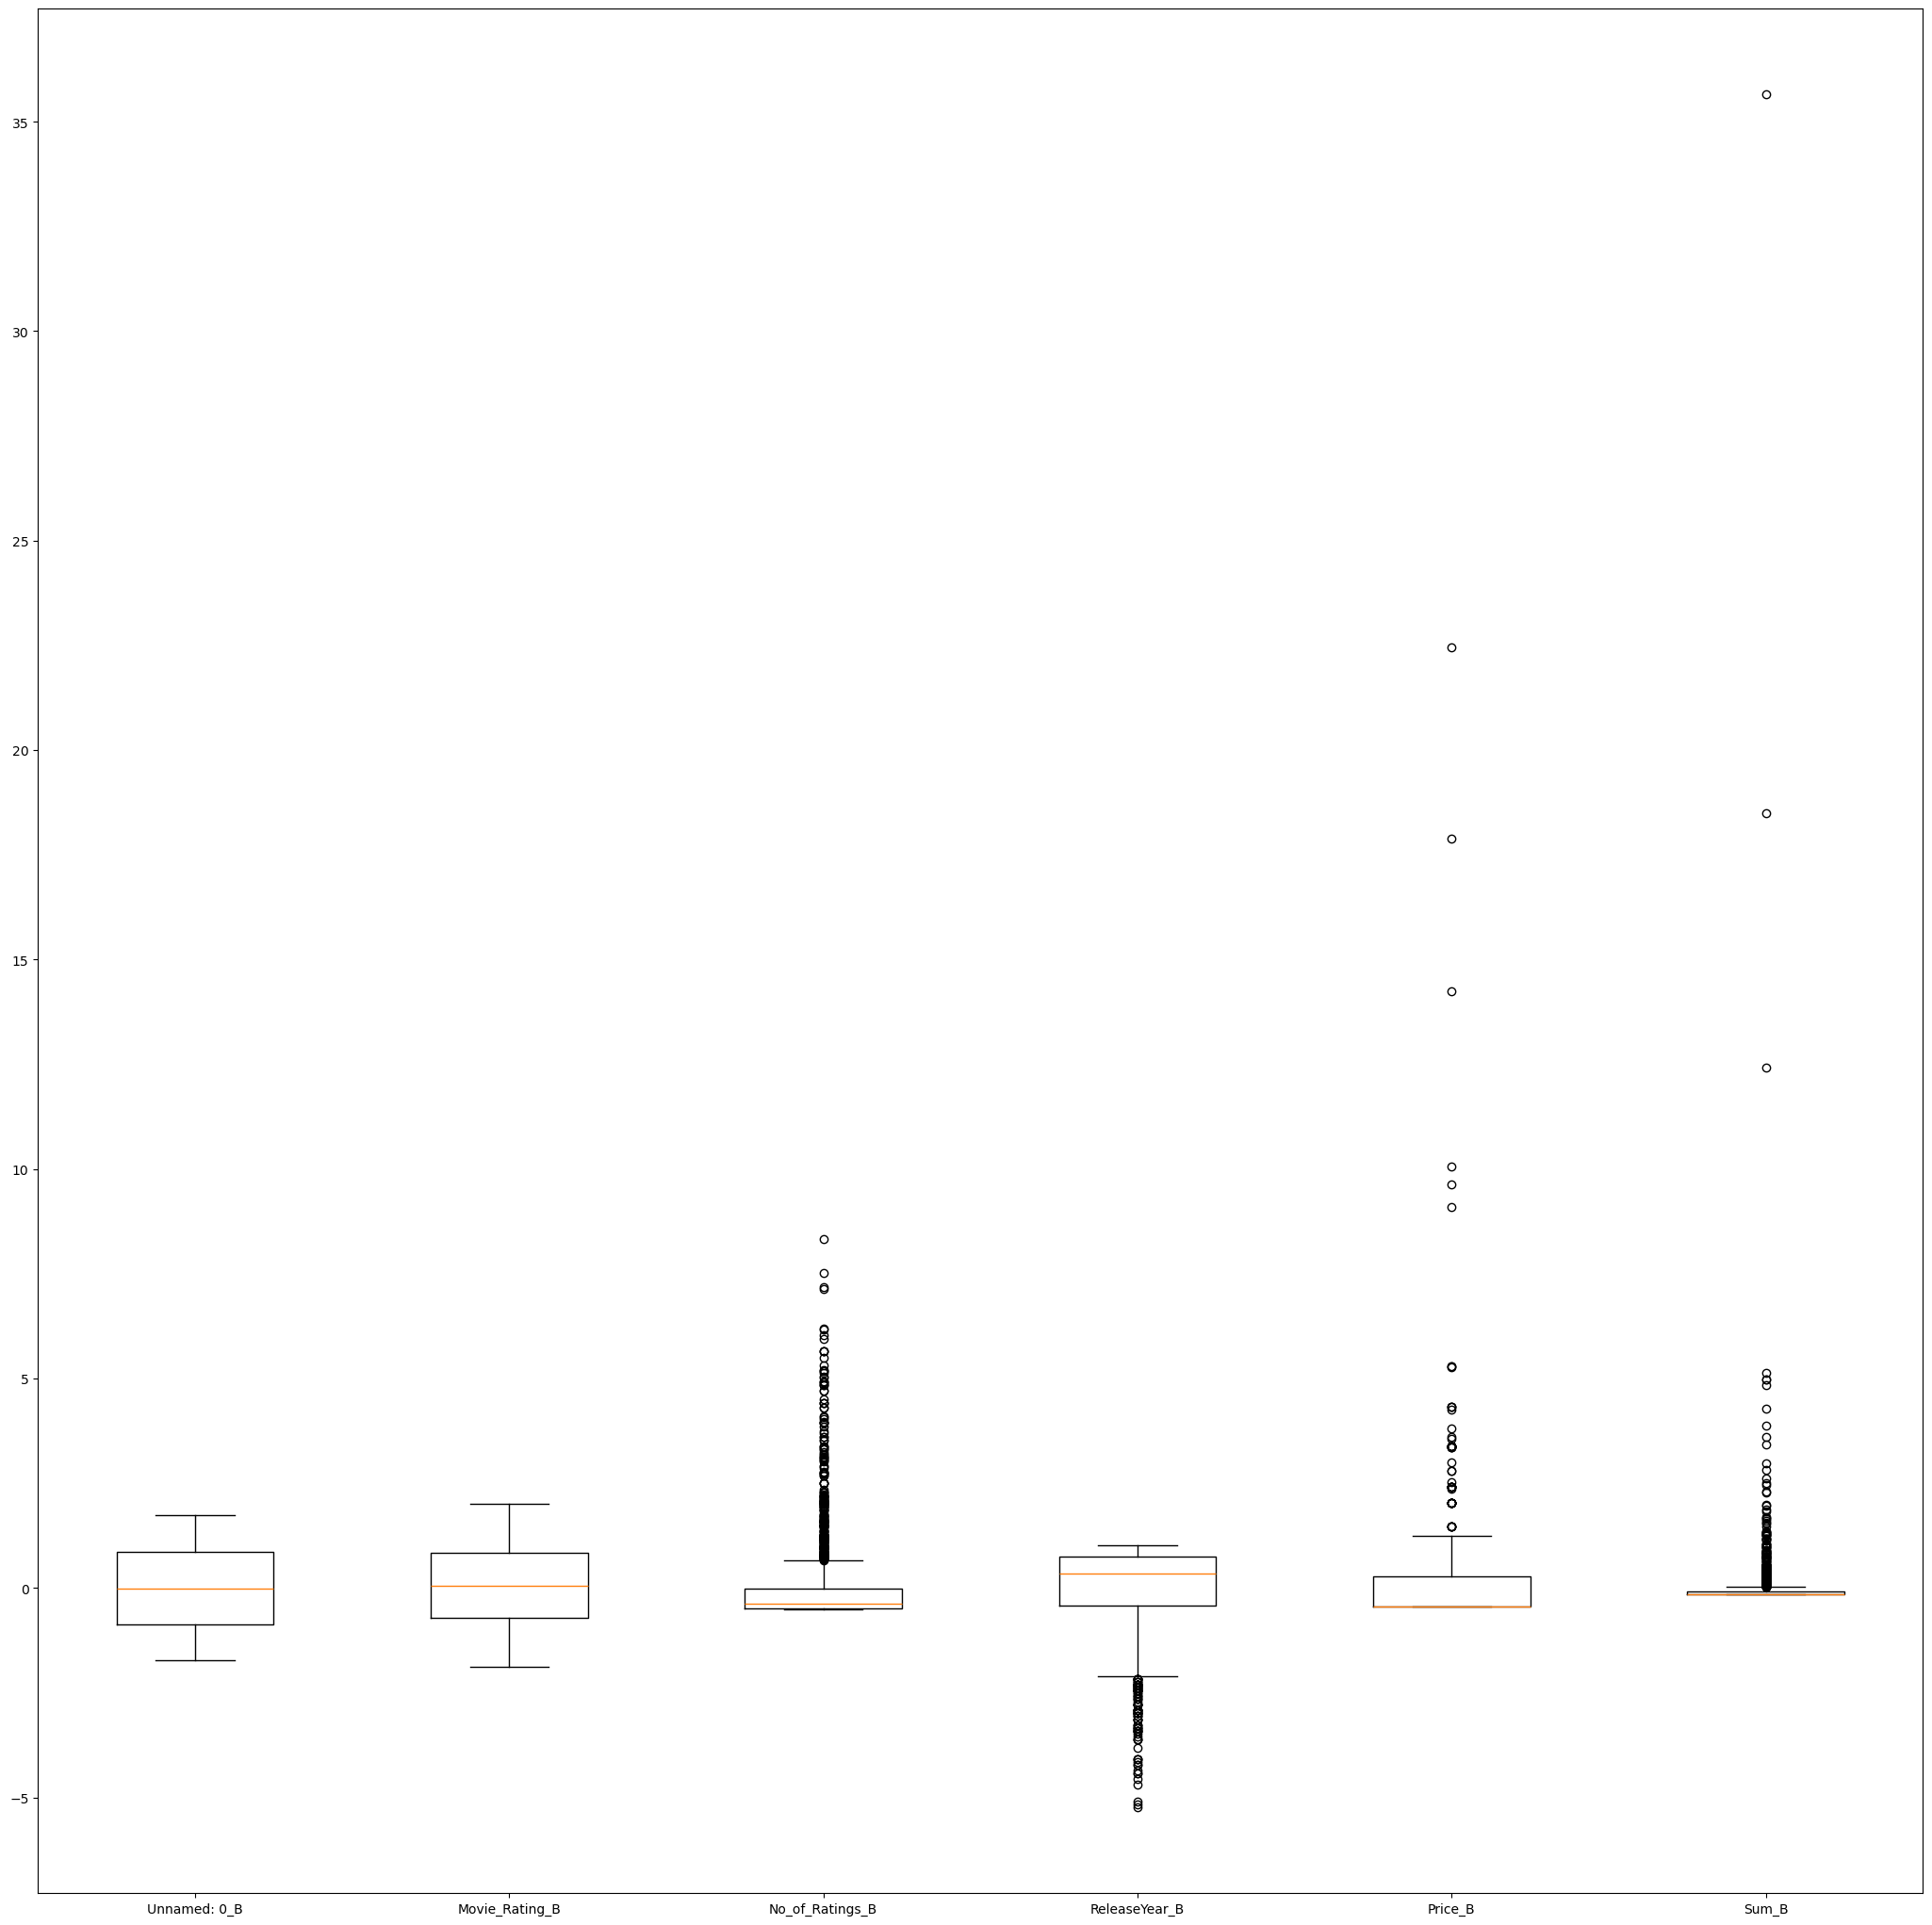

In [8]:
fig = plt.figure(figsize = (20, 20))
ax = fig.add_axes([0, 0, 1, 1])
ax.set_xticklabels(df_std.columns)

data = []
for col in df_std.columns:
  data.append(df_std[col])

bp = ax.boxplot(data, widths=0.5)
plt.show()

In [9]:
df['Price'].describe()

count    2108.000000
mean        2.316698
std         5.239840
min         0.000000
25%         0.000000
50%         0.000000
75%         3.790000
max       119.990000
Name: Price, dtype: float64

In [10]:
df[df.Price == df.Price.max()]

,Unnamed: 0,title,Movie_Rating,No_of_Ratings,Format,ReleaseYear,MPAA_Rating,Directed_By,Starring,Price,Sum
1683,1692,Game of Thrones: The Complete Collection [4K UHD],4.6,10224,4K,2000.0,NoRate,Various,Various,119.99,1226777.76


In [11]:
df[df.Price == df.Price.min()]

,Unnamed: 0,title,Movie_Rating,No_of_Ratings,Format,ReleaseYear,MPAA_Rating,Directed_By,Starring,Price,Sum
0,0,Totally Killer,4.3,323,Prime Video,2023.0,R,Nahnatchka Khan,"Kiernan Shipka,Olivia Holt,Julie Bowen",0.0,0.0
2,2,A Million Miles Away,4.9,1126,Prime Video,2023.0,PG,Alejandra Márquez Abella,"Michael Peña,Rosa Salazar",0.0,0.0
3,3,Kelce,5.0,570,Prime Video,2023.0,NoRate,Don Argott,"Jason Kelce,Travis Kelce,Kylie Kelce,Connor Ba...",0.0,0.0
4,4,Despicable Me 3,4.8,31813,Prime Video,2017.0,PG,"Pierre Coffin,Kyle Balda","Steve Carell,Kristen Wiig,Trey Parker",0.0,0.0
7,7,The Proposal,4.8,52086,Prime Video,2009.0,PG-13,Anne Fletcher,"Betty White,Sandra Bullock,Ryan Reynolds",0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
2099,2108,The Dark Side of Everest,4.6,36,Prime Video,1970.0,NoRate,Andrew Palmer,"Pete Athans,Zam Baring,Neil Beidleman",0.0,0.0
2100,2109,The Secret of Moonacre,4.6,1144,Prime Video,2010.0,PG,Gabor Csupo,"Ioan Gruffudd,Tim Curry,Natasha McElhone",0.0,0.0
2101,2110,Princess Alice: The Queen's Mother-In-Law,4.4,31,Prime Video,2012.0,NoRate,Rob Coldstream,Mark Halliley,0.0,0.0
2104,2113,Lethal Legacy,5.0,2,Prime Video,2023.0,NoRate,Joe Carroll,"Brittany Inge,Nathan Owens,James Black,Dorian ...",0.0,0.0


In [12]:
df.loc[(df.Price == df.Price.max()), 'Price'] = np.NaN
df.loc[(df.Price == df.Price.min()), 'Price'] = np.NaN
df[df.isna().sum(axis=1) > 0]

,Unnamed: 0,title,Movie_Rating,No_of_Ratings,Format,ReleaseYear,MPAA_Rating,Directed_By,Starring,Price,Sum
0,0,Totally Killer,4.3,323,Prime Video,2023.0,R,Nahnatchka Khan,"Kiernan Shipka,Olivia Holt,Julie Bowen",NaN,0.0
2,2,A Million Miles Away,4.9,1126,Prime Video,2023.0,PG,Alejandra Márquez Abella,"Michael Peña,Rosa Salazar",NaN,0.0
3,3,Kelce,5.0,570,Prime Video,2023.0,NoRate,Don Argott,"Jason Kelce,Travis Kelce,Kylie Kelce,Connor Ba...",NaN,0.0
4,4,Despicable Me 3,4.8,31813,Prime Video,2017.0,PG,"Pierre Coffin,Kyle Balda","Steve Carell,Kristen Wiig,Trey Parker",NaN,0.0
7,7,The Proposal,4.8,52086,Prime Video,2009.0,PG-13,Anne Fletcher,"Betty White,Sandra Bullock,Ryan Reynolds",NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...
2099,2108,The Dark Side of Everest,4.6,36,Prime Video,1970.0,NoRate,Andrew Palmer,"Pete Athans,Zam Baring,Neil Beidleman",NaN,0.0
2100,2109,The Secret of Moonacre,4.6,1144,Prime Video,2010.0,PG,Gabor Csupo,"Ioan Gruffudd,Tim Curry,Natasha McElhone",NaN,0.0
2101,2110,Princess Alice: The Queen's Mother-In-Law,4.4,31,Prime Video,2012.0,NoRate,Rob Coldstream,Mark Halliley,NaN,0.0
2104,2113,Lethal Legacy,5.0,2,Prime Video,2023.0,NoRate,Joe Carroll,"Brittany Inge,Nathan Owens,James Black,Dorian ...",NaN,0.0


In [13]:
df['Price'].describe()

count    1010.000000
mean        4.716446
std         5.657779
min         0.890000
25%         3.590000
50%         3.790000
75%         3.990000
max        95.990000
Name: Price, dtype: float64

In [14]:
df[df.Price == df.Price.max()]

,Unnamed: 0,title,Movie_Rating,No_of_Ratings,Format,ReleaseYear,MPAA_Rating,Directed_By,Starring,Price,Sum
1114,1114,Harry Potter: 8-Film Collection [4K Ultra HD +...,4.8,86512,4K,2000.0,NoRate,"Chris Columbus,Alfonso Cuarón,Mike Newell,Davi...","Daniel Radcliffe,Rupert Grint,Emma Watson",95.99,8304286.88


In [15]:
df.loc[(df.Price == df.Price.max()), 'Price'] = np.NaN
df[df.isna().sum(axis=1) > 0]

,Unnamed: 0,title,Movie_Rating,No_of_Ratings,Format,ReleaseYear,MPAA_Rating,Directed_By,Starring,Price,Sum
0,0,Totally Killer,4.3,323,Prime Video,2023.0,R,Nahnatchka Khan,"Kiernan Shipka,Olivia Holt,Julie Bowen",NaN,0.0
2,2,A Million Miles Away,4.9,1126,Prime Video,2023.0,PG,Alejandra Márquez Abella,"Michael Peña,Rosa Salazar",NaN,0.0
3,3,Kelce,5.0,570,Prime Video,2023.0,NoRate,Don Argott,"Jason Kelce,Travis Kelce,Kylie Kelce,Connor Ba...",NaN,0.0
4,4,Despicable Me 3,4.8,31813,Prime Video,2017.0,PG,"Pierre Coffin,Kyle Balda","Steve Carell,Kristen Wiig,Trey Parker",NaN,0.0
7,7,The Proposal,4.8,52086,Prime Video,2009.0,PG-13,Anne Fletcher,"Betty White,Sandra Bullock,Ryan Reynolds",NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...
2099,2108,The Dark Side of Everest,4.6,36,Prime Video,1970.0,NoRate,Andrew Palmer,"Pete Athans,Zam Baring,Neil Beidleman",NaN,0.0
2100,2109,The Secret of Moonacre,4.6,1144,Prime Video,2010.0,PG,Gabor Csupo,"Ioan Gruffudd,Tim Curry,Natasha McElhone",NaN,0.0
2101,2110,Princess Alice: The Queen's Mother-In-Law,4.4,31,Prime Video,2012.0,NoRate,Rob Coldstream,Mark Halliley,NaN,0.0
2104,2113,Lethal Legacy,5.0,2,Prime Video,2023.0,NoRate,Joe Carroll,"Brittany Inge,Nathan Owens,James Black,Dorian ...",NaN,0.0


In [16]:
df['Price'].describe()

count    1009.000000
mean        4.625986
std         4.875375
min         0.890000
25%         3.590000
50%         3.790000
75%         3.990000
max        76.990000
Name: Price, dtype: float64

In [17]:
df_num = df.select_dtypes(exclude=['object'])
imputer = KNNImputer(n_neighbors=5, weights='uniform')
imputer.fit(df_num)
df_num = pd.DataFrame(imputer.transform(df_num), index=df_num.index, columns=df_num.columns)
df['Price'] = df_num['Price']
df['Price'].describe()

count    2108.000000
mean        3.092880
std         3.777908
min         0.890000
25%         1.550000
50%         2.190000
75%         3.790000
max        76.990000
Name: Price, dtype: float64

In [18]:
df.loc[1114]

Unnamed: 0                                                    1114
title            Harry Potter: 8-Film Collection [4K Ultra HD +...
Movie_Rating                                                   4.8
No_of_Ratings                                                86512
Format                                                          4K
ReleaseYear                                                 2000.0
MPAA_Rating                                                 NoRate
Directed_By      Chris Columbus,Alfonso Cuarón,Mike Newell,Davi...
Starring                 Daniel Radcliffe,Rupert Grint,Emma Watson
Price                                                        33.99
Sum                                                     8304286.88
Name: 1114, dtype: object

In [19]:
df.loc[2100]

Unnamed: 0                                           2109
title                              The Secret of Moonacre
Movie_Rating                                          4.6
No_of_Ratings                                        1144
Format                                        Prime Video
ReleaseYear                                        2010.0
MPAA_Rating                                            PG
Directed_By                                   Gabor Csupo
Starring         Ioan Gruffudd,Tim Curry,Natasha McElhone
Price                                                1.55
Sum                                                   0.0
Name: 2100, dtype: object

In [20]:
df.loc[2]

Unnamed: 0                               2
title                 A Million Miles Away
Movie_Rating                           4.9
No_of_Ratings                         1126
Format                         Prime Video
ReleaseYear                         2023.0
MPAA_Rating                             PG
Directed_By       Alejandra Márquez Abella
Starring         Michael Peña,Rosa Salazar
Price                                 2.45
Sum                                    0.0
Name: 2, dtype: object

C:\Users\Leo\AppData\Local\Temp\ipykernel_21540\2217183055.py:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(df_std.columns)


<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

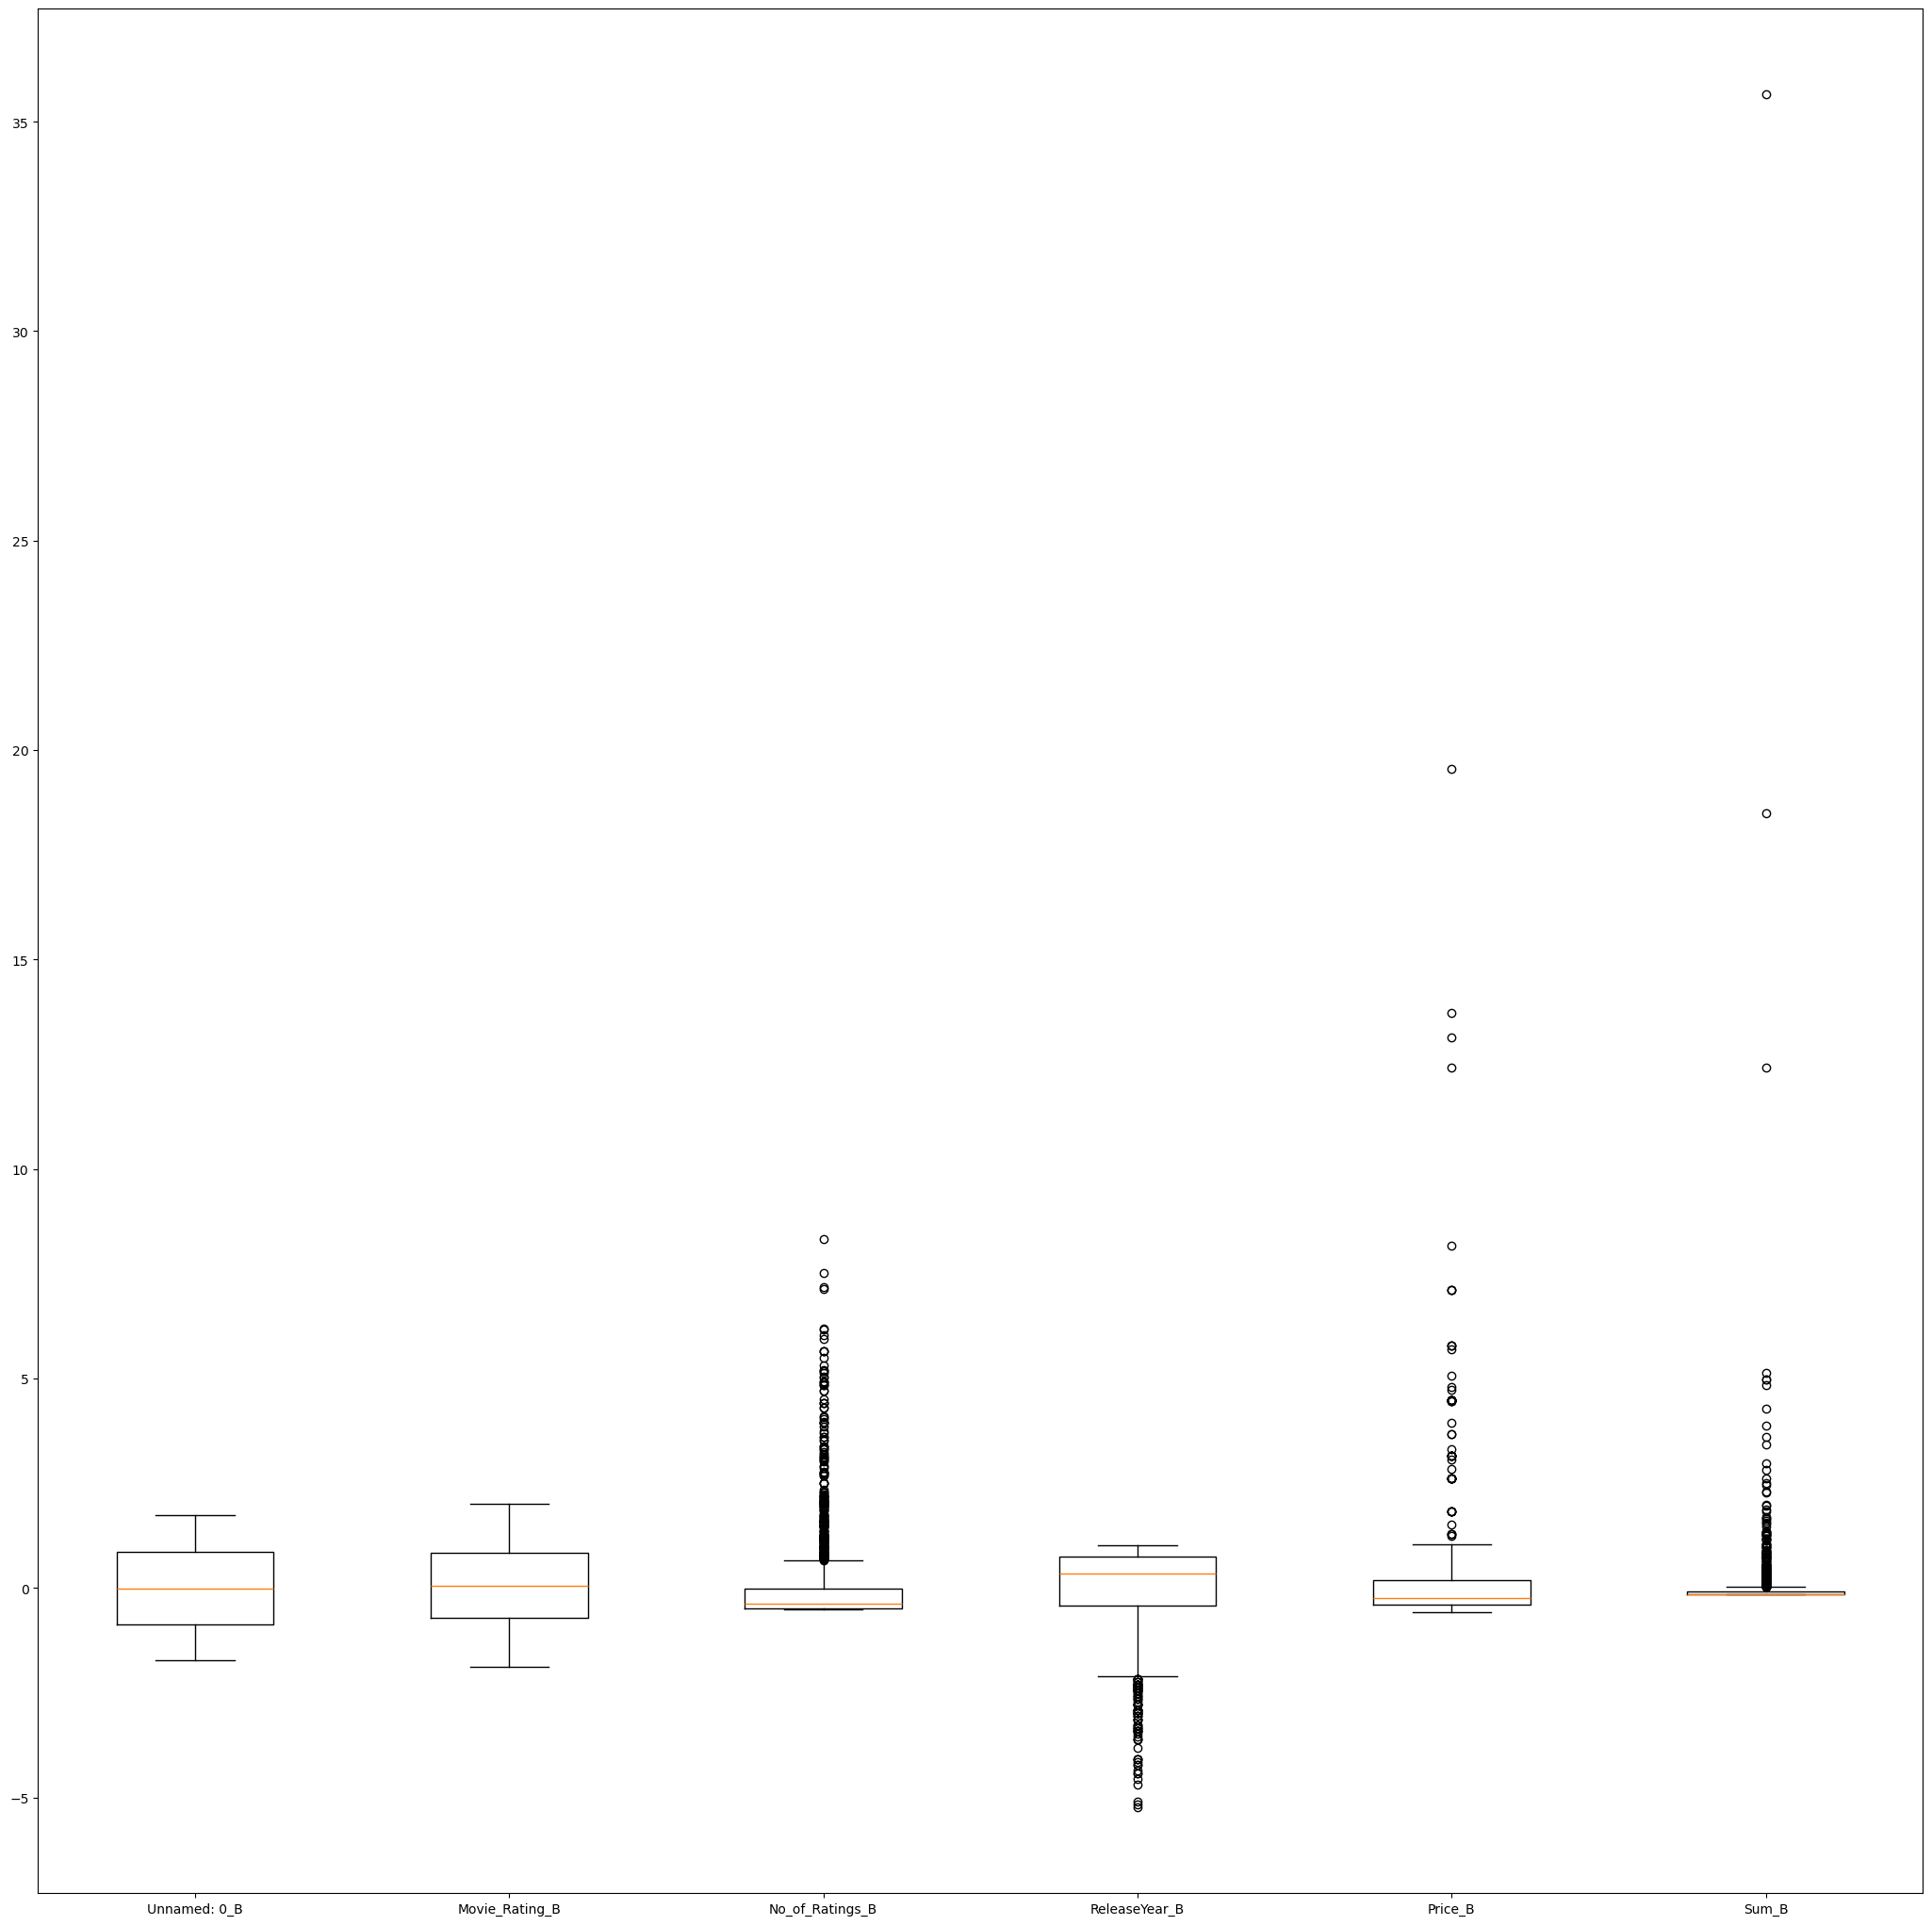

In [21]:

df_std = pd.DataFrame()
for col in df_num.columns:
  m = df_num[col].mean()
  s = df_num[col].std()
  df_std[col + '_B'] = (df_num[col] - m)/s

  fig = plt.figure(figsize = (20, 20))
ax = fig.add_axes([0, 0, 1, 1])
ax.set_xticklabels(df_std.columns)

data = []
for col in df_std.columns:
  data.append(df_std[col])

bp = ax.boxplot(data, widths=0.5)
plt.show()

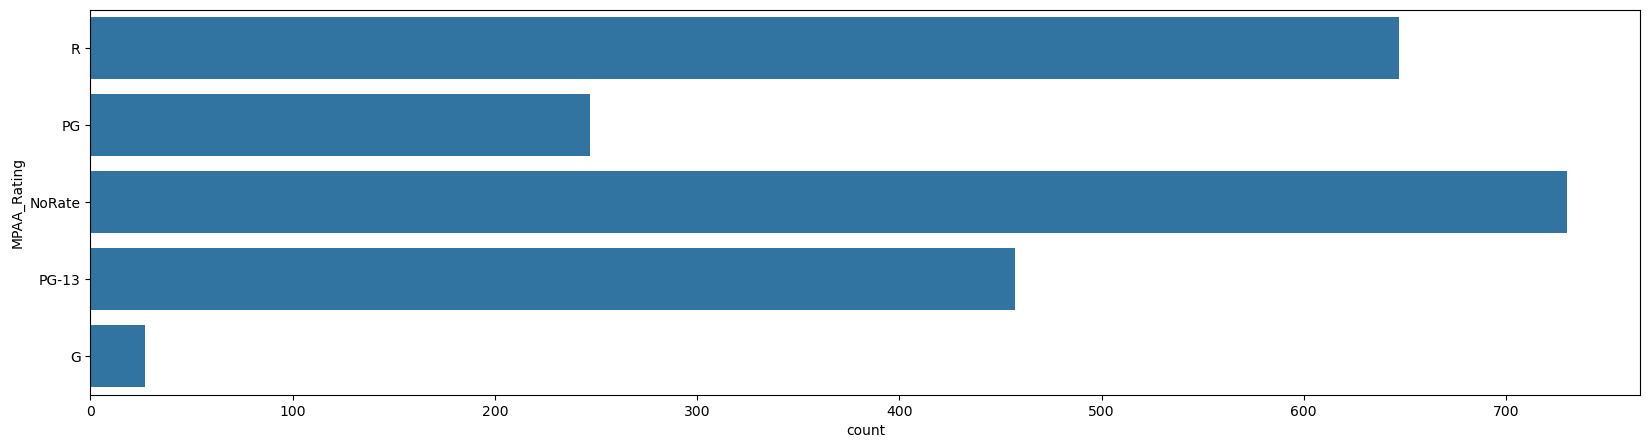

In [22]:
plt.figure(1 , figsize = (20 , 5))
sns.countplot(y = 'MPAA_Rating' , data = df)
plt.show()

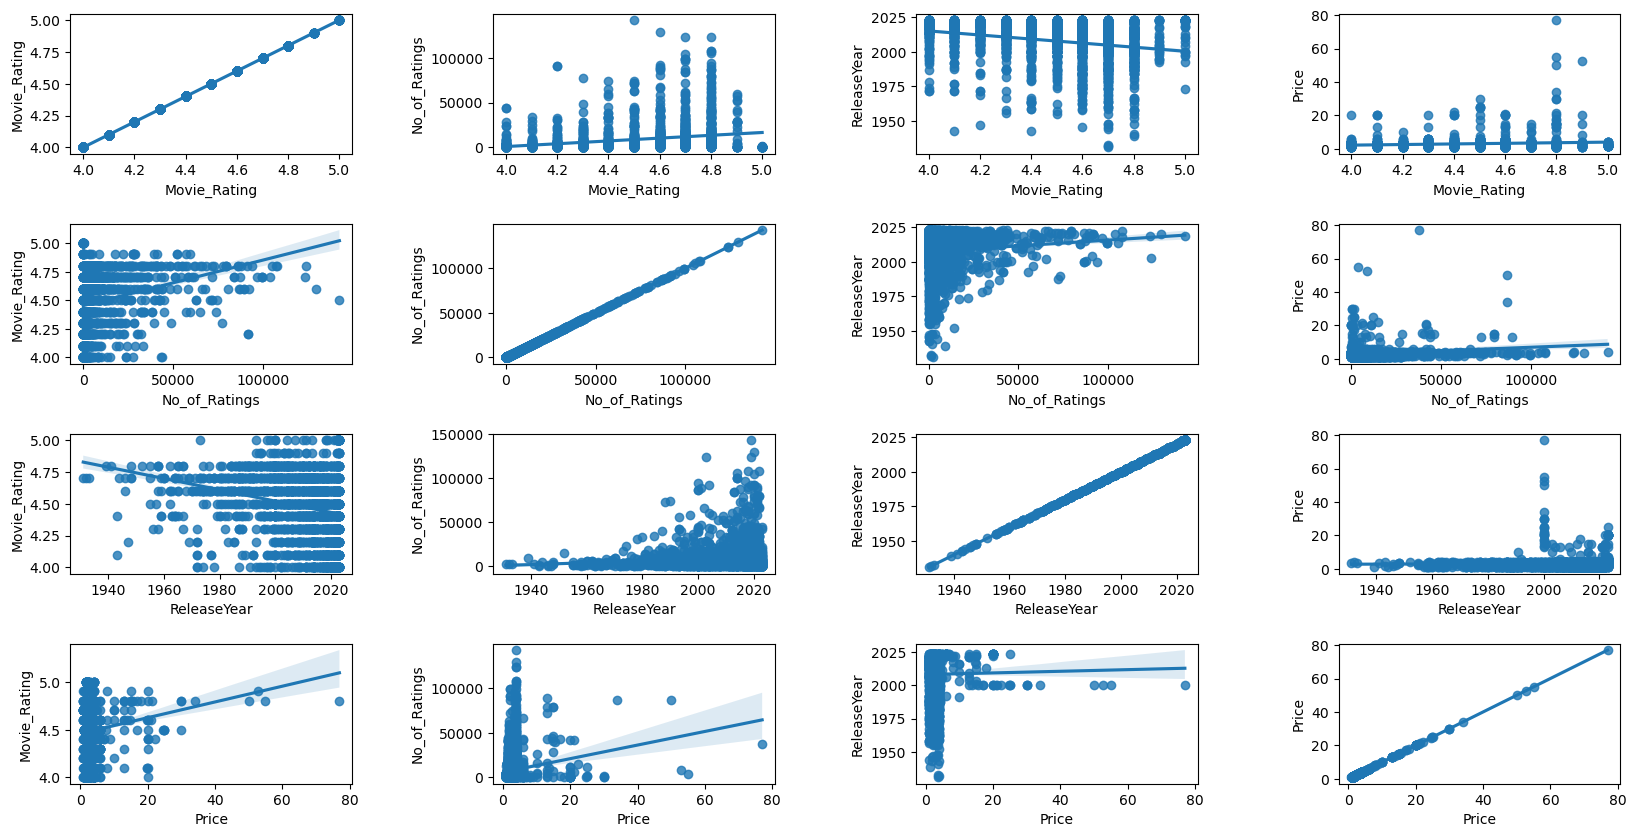

In [23]:
plt.figure(1, figsize = (20 , 10))
n = 0
for x in ['Movie_Rating', 'No_of_Ratings', 'ReleaseYear', 'Price']:
    for y in ['Movie_Rating', 'No_of_Ratings', 'ReleaseYear', 'Price']:
        n += 1
        plt.subplot(4, 4, n)
        plt.subplots_adjust(hspace = 0.5, wspace = 0.5)
        sns.regplot(x = x, y = y, data = df)
        plt.ylabel(y.split()[0]+' '+y.split()[1] if len(y.split()) > 1 else y)
plt.show()

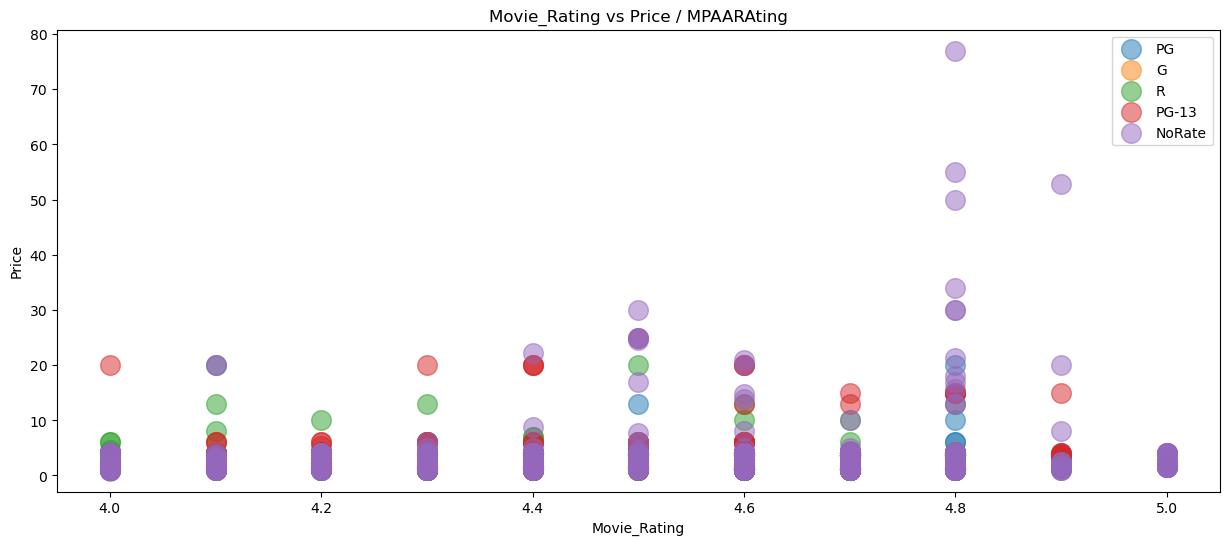

In [24]:
plt.figure(1, figsize = (15, 6))
for Raiting in ['PG', 'G', 'R','PG-13', 'NoRate']:
    plt.scatter(x = 'Movie_Rating', y = 'Price', data = df[df['MPAA_Rating'] == Raiting],
                s = 200, alpha = 0.5, label = Raiting)
plt.xlabel('Movie_Rating')
plt.ylabel('Price')
plt.title('Movie_Rating vs Price / MPAARAting')
plt.legend()
plt.show()

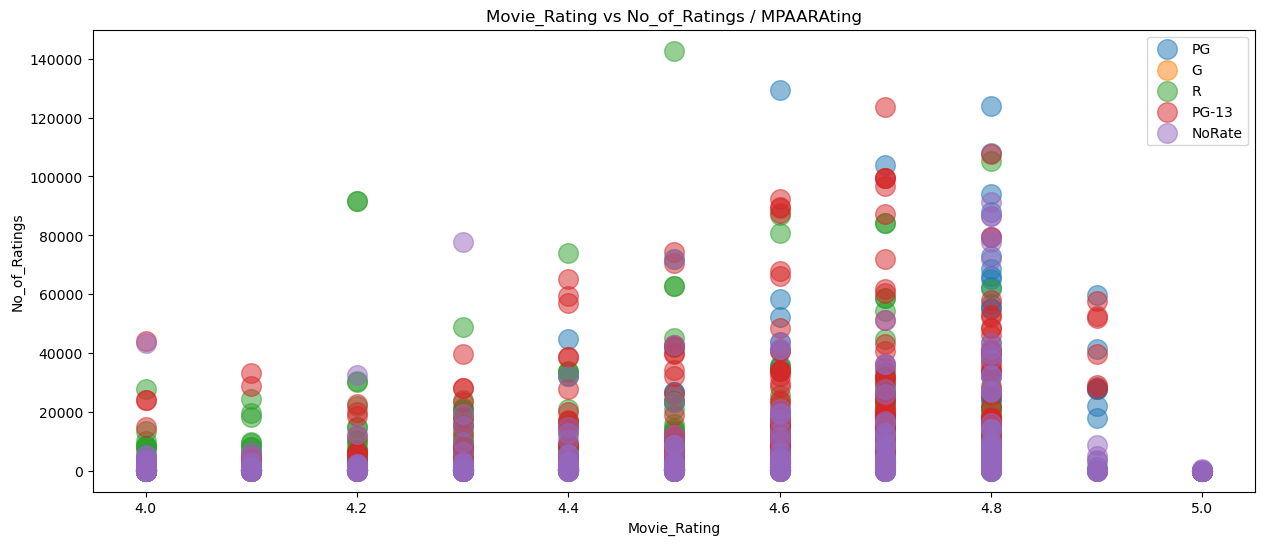

In [25]:
plt.figure(1, figsize = (15, 6))
for Raiting in ['PG', 'G', 'R','PG-13', 'NoRate']:
    plt.scatter(x = 'Movie_Rating', y = 'No_of_Ratings', data = df[df['MPAA_Rating'] == Raiting],
                s = 200, alpha = 0.5, label = Raiting)
plt.xlabel('Movie_Rating')
plt.ylabel('No_of_Ratings')
plt.title('Movie_Rating vs No_of_Ratings / MPAARAting')
plt.legend()
plt.show()

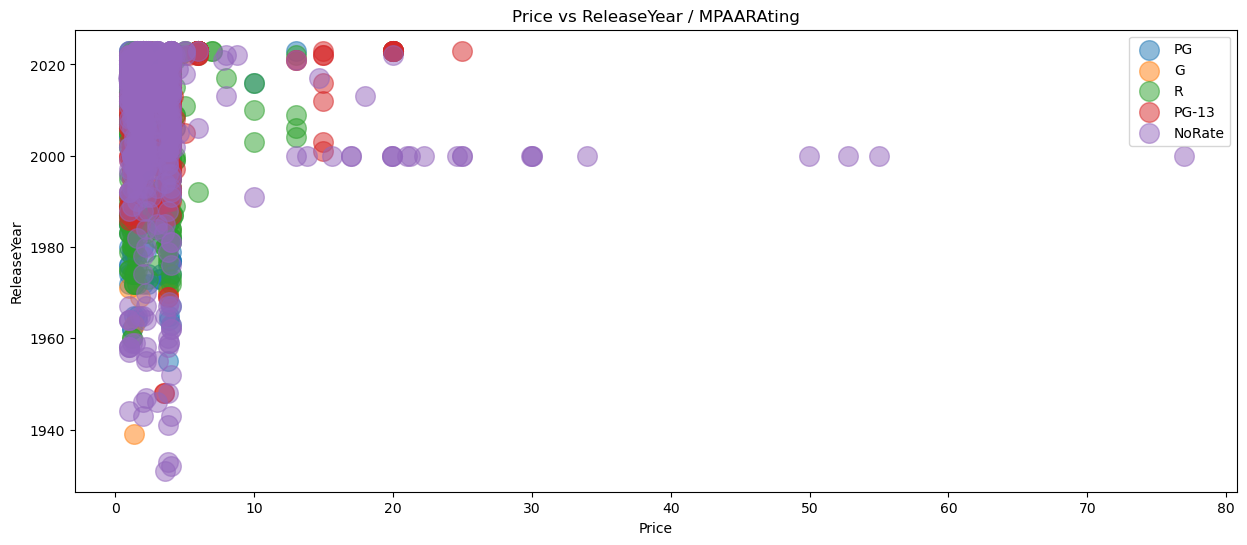

In [26]:
plt.figure(1, figsize = (15, 6))
for Raiting in ['PG', 'G', 'R','PG-13', 'NoRate']:
    plt.scatter(x = 'Price', y = 'ReleaseYear', data = df[df['MPAA_Rating'] == Raiting],
                s = 200, alpha = 0.5, label = Raiting)
plt.xlabel('Price')
plt.ylabel('ReleaseYear')
plt.title('Price vs ReleaseYear / MPAARAting')
plt.legend()
plt.show()

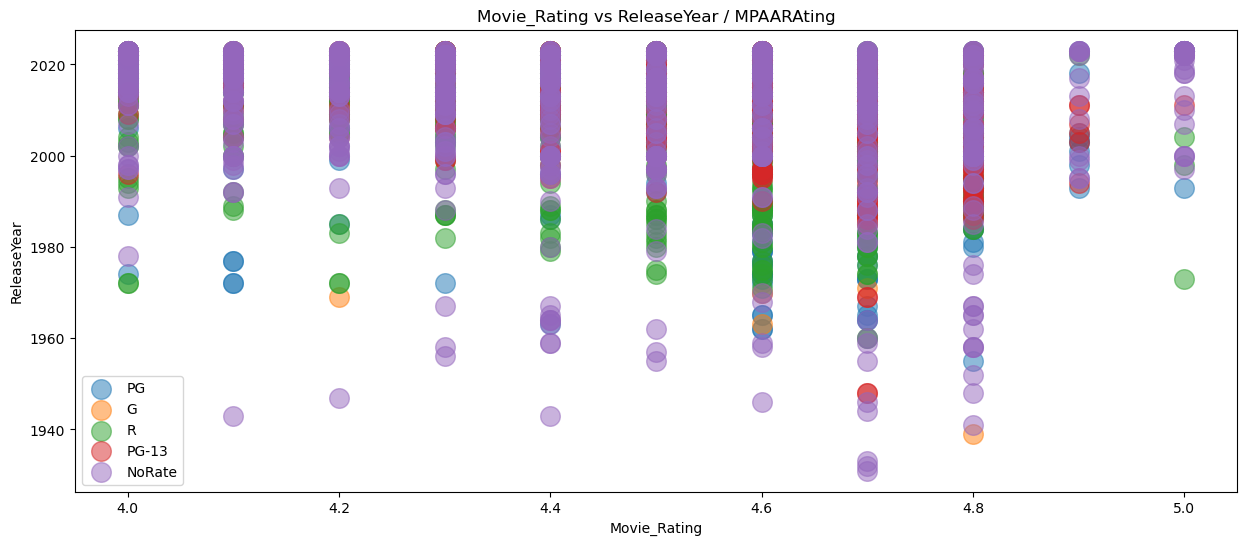

In [27]:
plt.figure(1, figsize = (15, 6))
for Raiting in ['PG', 'G', 'R','PG-13', 'NoRate']:
    plt.scatter(x = 'Movie_Rating', y = 'ReleaseYear', data = df[df['MPAA_Rating'] == Raiting],
                s = 200, alpha = 0.5, label = Raiting)
plt.xlabel('Movie_Rating')
plt.ylabel('ReleaseYear')
plt.title('Movie_Rating vs ReleaseYear / MPAARAting')
plt.legend()
plt.show()

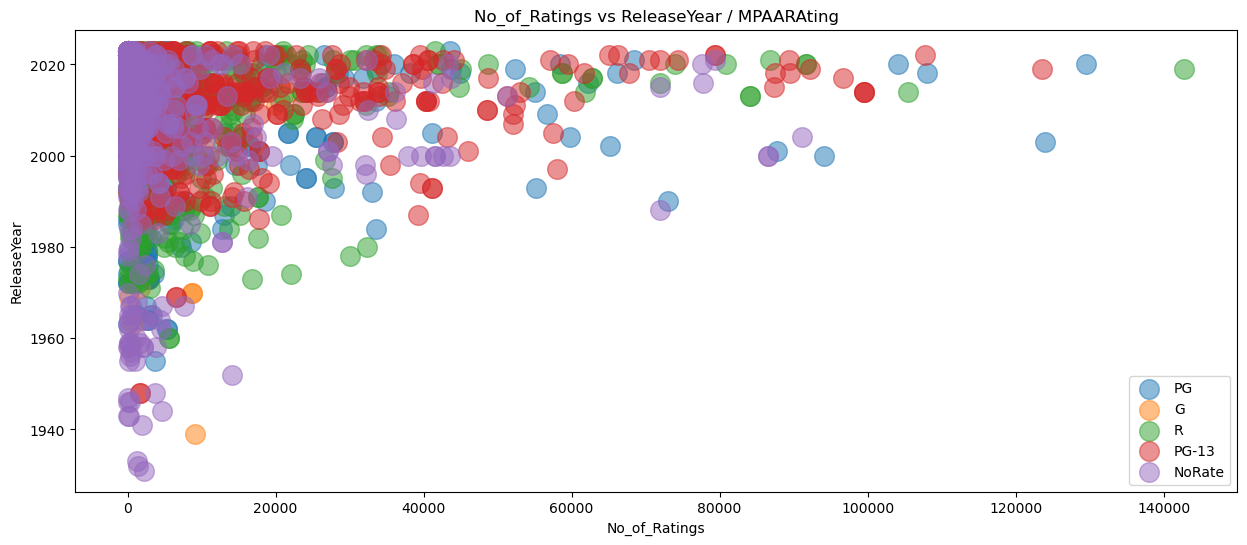

In [28]:
plt.figure(1, figsize = (15, 6))
for Raiting in ['PG', 'G', 'R','PG-13', 'NoRate']:
    plt.scatter(x = 'No_of_Ratings', y = 'ReleaseYear', data = df[df['MPAA_Rating'] == Raiting],
                s = 200, alpha = 0.5, label = Raiting)
plt.xlabel('No_of_Ratings')
plt.ylabel('ReleaseYear')
plt.title('No_of_Ratings vs ReleaseYear / MPAARAting')
plt.legend()
plt.show()

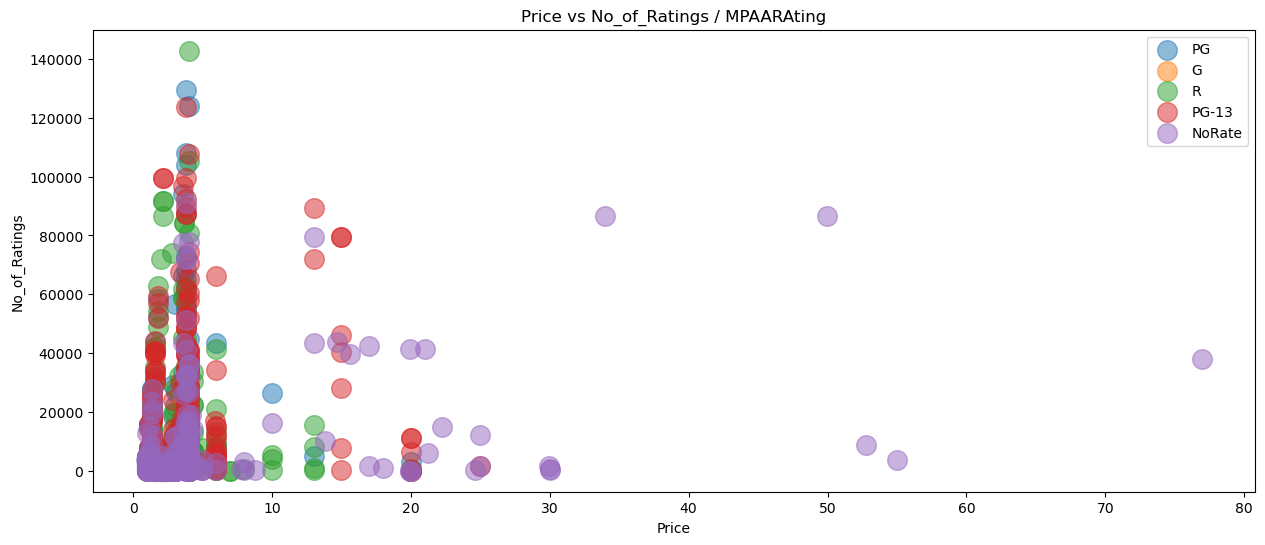

In [29]:
plt.figure(1, figsize = (15, 6))
for Raiting in ['PG', 'G', 'R','PG-13', 'NoRate']:
    plt.scatter(x = 'Price', y = 'No_of_Ratings', data = df[df['MPAA_Rating'] == Raiting],
                s = 200, alpha = 0.5, label = Raiting)
plt.xlabel('Price')
plt.ylabel('No_of_Ratings')
plt.title('Price vs No_of_Ratings / MPAARAting')
plt.legend()
plt.show()

C:\Users\Leo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=9.
  warnings.warn(
C:\Users\Leo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=9.
  warnings.warn(
C:\Users\Leo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=9.
  warnings.warn(
C:\Users\Leo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with M

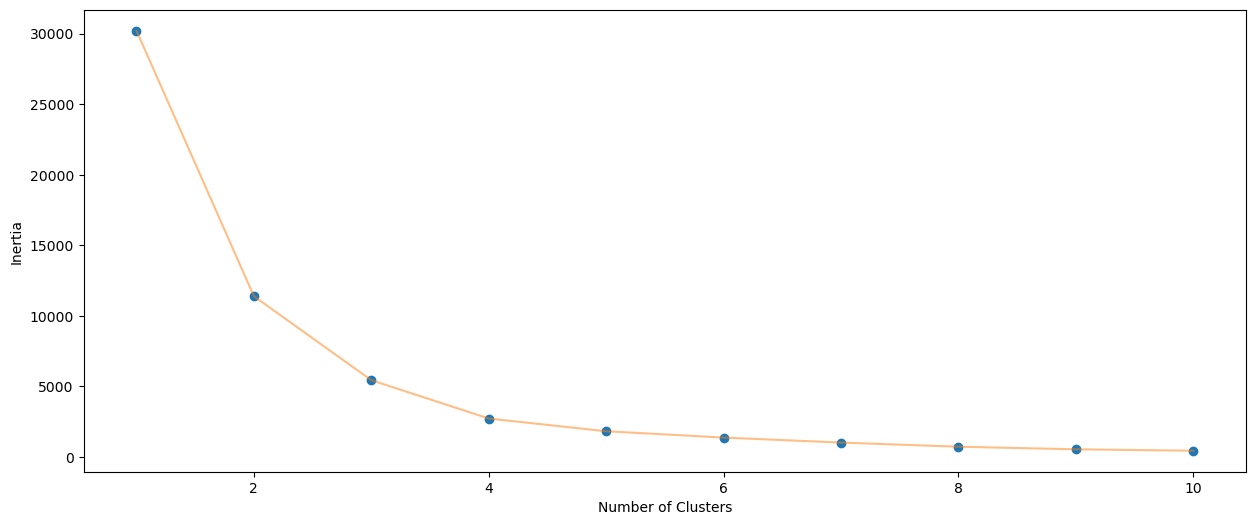

In [30]:
X1 = df[['Price', 'Movie_Rating']].iloc[: , :].values
inertia = []
for n in range(1 , 11):
    algorithm = (KMeans(n_clusters = n, init='k-means++', n_init = 10, max_iter=300,
                        tol=0.0001,  random_state= 111, algorithm='lloyd') )
    algorithm.fit(X1)
    inertia.append(algorithm.inertia_)

plt.figure(1, figsize = (15, 6))
plt.plot(np.arange(1, 11), inertia, 'o')
plt.plot(np.arange(1, 11), inertia, '-', alpha = 0.5)
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

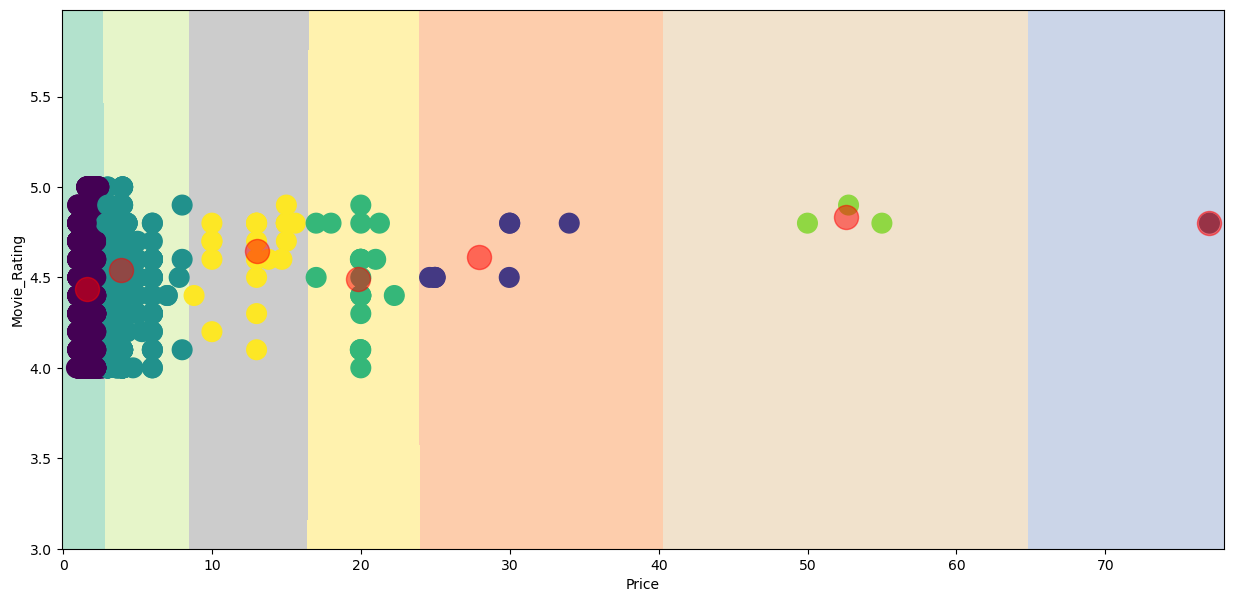

In [31]:
algorithm = (KMeans(n_clusters = 7, init='k-means++', n_init = 10, max_iter = 300,
                        tol=0.0001,  random_state= 111, algorithm='elkan') )
algorithm.fit(X1)
labels1 = algorithm.labels_
centroids1 = algorithm.cluster_centers_

h = 0.02
x_min, x_max = X1[:, 0].min() - 1, X1[:, 0].max() + 1
y_min, y_max = X1[:, 1].min() - 1, X1[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = algorithm.predict(np.c_[xx.ravel(), yy.ravel()])

plt.figure(1, figsize = (15, 7))
plt.clf()
Z = Z.reshape(xx.shape)
plt.imshow(Z, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap = plt.cm.Pastel2, aspect = 'auto', origin='lower')

plt.scatter( x='Price', y ='Movie_Rating', data = df, c = labels1, s = 200)
plt.scatter(x = centroids1[: , 0], y = centroids1[: , 1], s = 300, c = 'red', alpha = 0.5)
plt.xlabel('Price')
plt.ylabel('Movie_Rating')
plt.show()

2. Оценка фильма и количество оценок

C:\Users\Leo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=9.
  warnings.warn(
C:\Users\Leo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=9.
  warnings.warn(
C:\Users\Leo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=9.
  warnings.warn(
C:\Users\Leo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with M

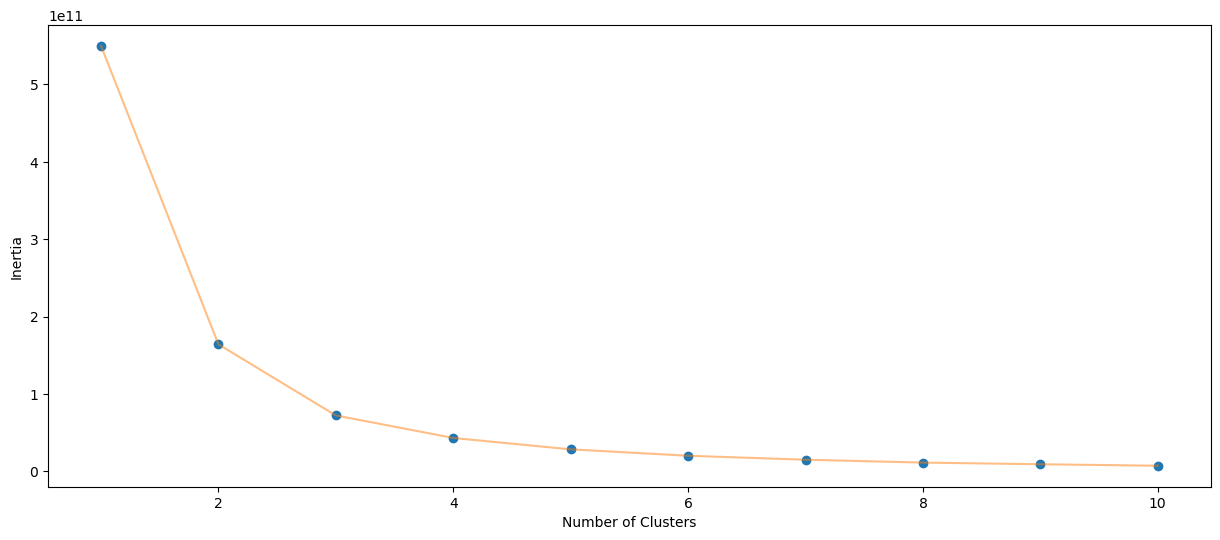

In [32]:
X2 = df[['Movie_Rating', 'No_of_Ratings']].iloc[: , :].values
inertia = []
for n in range(1 , 11):
    algorithm = (KMeans(n_clusters = n, init='k-means++', n_init = 10, max_iter=300,
                        tol=0.0001,  random_state= 111, algorithm='lloyd') )
    algorithm.fit(X2)
    inertia.append(algorithm.inertia_)

plt.figure(1, figsize = (15, 6))
plt.plot(np.arange(1, 11), inertia, 'o')
plt.plot(np.arange(1, 11), inertia, '-', alpha = 0.5)
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()


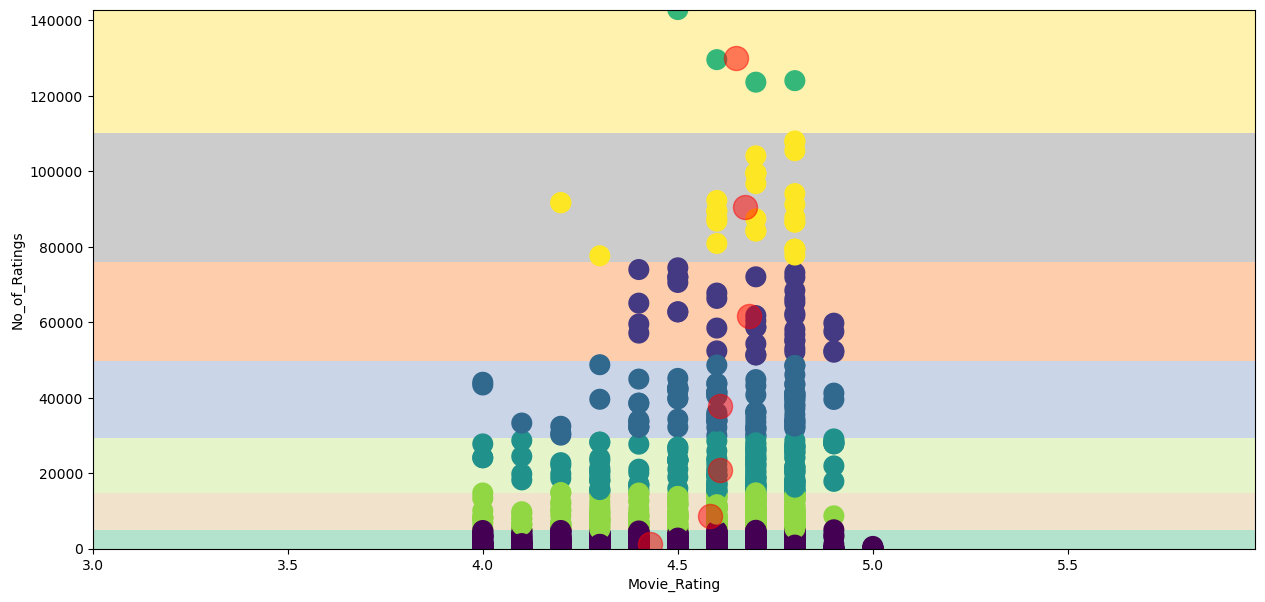

In [33]:
algorithm = (KMeans(n_clusters = 7, init='k-means++', n_init = 10, max_iter = 300,
                        tol=0.0001,  random_state= 111, algorithm='elkan') )
algorithm.fit(X2)
labels2 = algorithm.labels_
centroids2 = algorithm.cluster_centers_

h = 0.02
x_min, x_max = X2[:, 0].min() - 1, X2[:, 0].max() + 1
y_min, y_max = X2[:, 1].min() - 1, X2[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z2 = algorithm.predict(np.c_[xx.ravel(), yy.ravel()])

plt.figure(1, figsize = (15, 7))
plt.clf()
Z2 = Z2.reshape(xx.shape)
plt.imshow(Z2, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap = plt.cm.Pastel2, aspect = 'auto', origin='lower')

plt.scatter( x='Movie_Rating', y ='No_of_Ratings', data = df, c = labels2, s = 200)
plt.scatter(x = centroids2[: , 0], y = centroids2[: , 1], s = 300, c = 'red', alpha = 0.5)
plt.xlabel('Movie_Rating')
plt.ylabel('No_of_Ratings')

plt.show()

3.Цена и год выхода

C:\Users\Leo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=9.
  warnings.warn(
C:\Users\Leo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=9.
  warnings.warn(
C:\Users\Leo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=9.
  warnings.warn(
C:\Users\Leo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with M

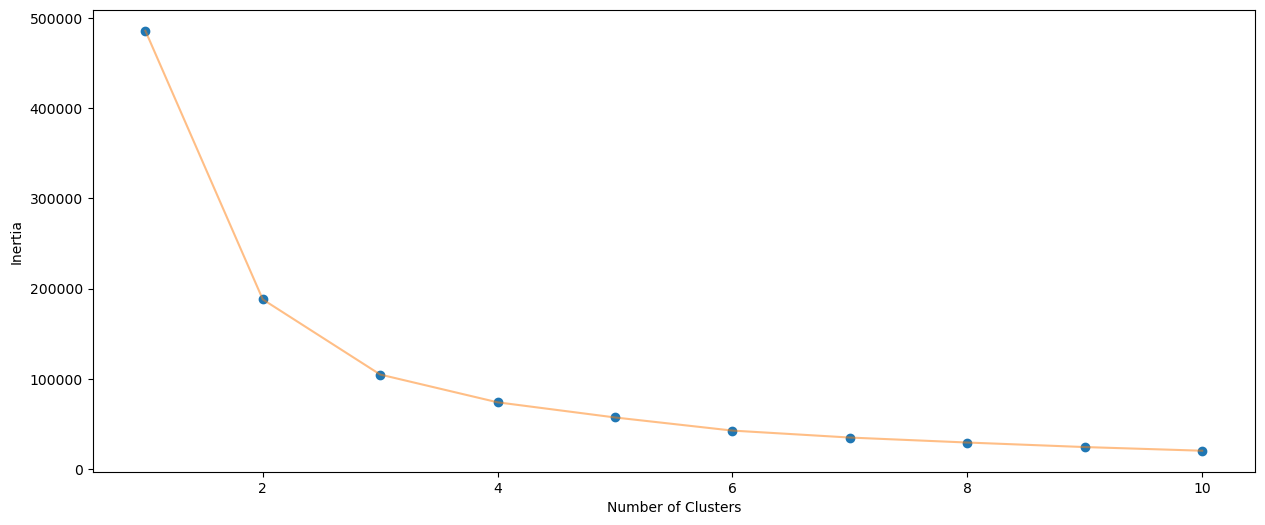

In [34]:
X3 = df[['Price', 'ReleaseYear']].iloc[: , :].values
inertia = []
for n in range(1 , 11):
    algorithm = (KMeans(n_clusters = n, init='k-means++', n_init = 10, max_iter=300,
                        tol=0.0001,  random_state= 111, algorithm='lloyd') )
    algorithm.fit(X3)
    inertia.append(algorithm.inertia_)

plt.figure(1, figsize = (15, 6))
plt.plot(np.arange(1, 11), inertia, 'o')
plt.plot(np.arange(1, 11), inertia, '-', alpha = 0.5)
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

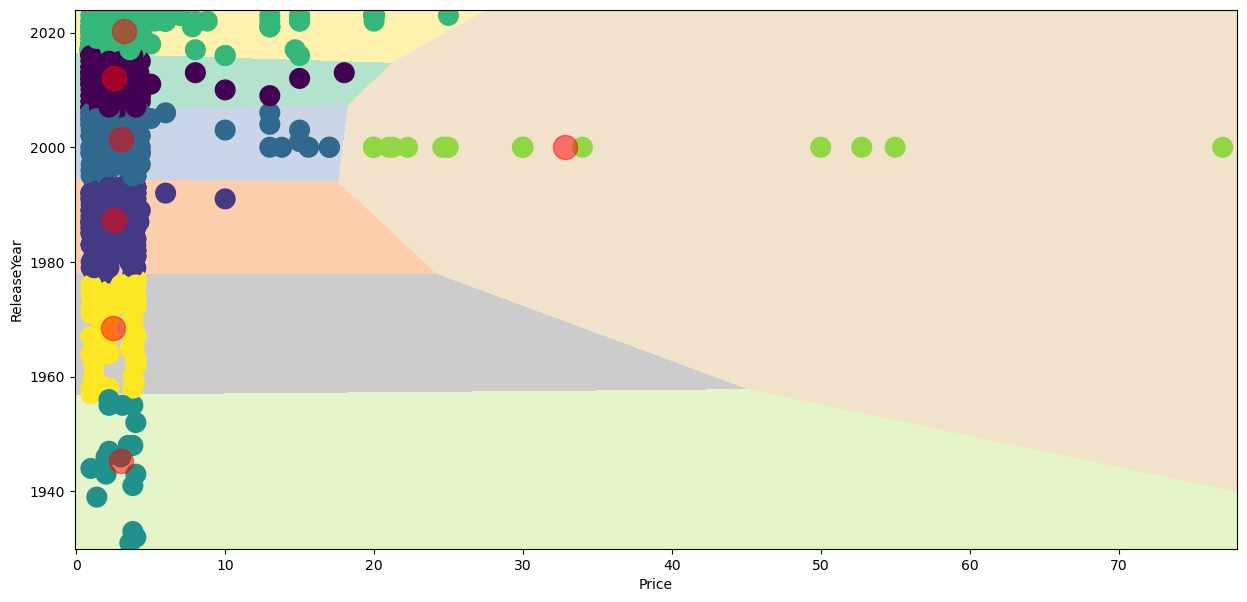

In [35]:
algorithm = (KMeans(n_clusters = 7, init='k-means++', n_init = 10, max_iter = 300,
                        tol=0.0001,  random_state= 111, algorithm='elkan') )
algorithm.fit(X3)
labels3 = algorithm.labels_
centroids3 = algorithm.cluster_centers_

h = 0.02
x_min, x_max = X3[:, 0].min() - 1, X3[:, 0].max() + 1
y_min, y_max = X3[:, 1].min() - 1, X3[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z3 = algorithm.predict(np.c_[xx.ravel(), yy.ravel()])

plt.figure(1, figsize = (15, 7))
plt.clf()
Z3 = Z3.reshape(xx.shape)
plt.imshow(Z3, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap = plt.cm.Pastel2, aspect = 'auto', origin='lower')

plt.scatter( x='Price', y ='ReleaseYear', data = df, c = labels3, s = 200)
plt.scatter(x = centroids3[: , 0], y = centroids3[: , 1], s = 300, c = 'red', alpha = 0.5)
plt.xlabel('Price')
plt.ylabel('ReleaseYear')

plt.show()

4.Оценка и год выхода

C:\Users\Leo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=9.
  warnings.warn(
C:\Users\Leo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=9.
  warnings.warn(
C:\Users\Leo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=9.
  warnings.warn(
C:\Users\Leo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with M

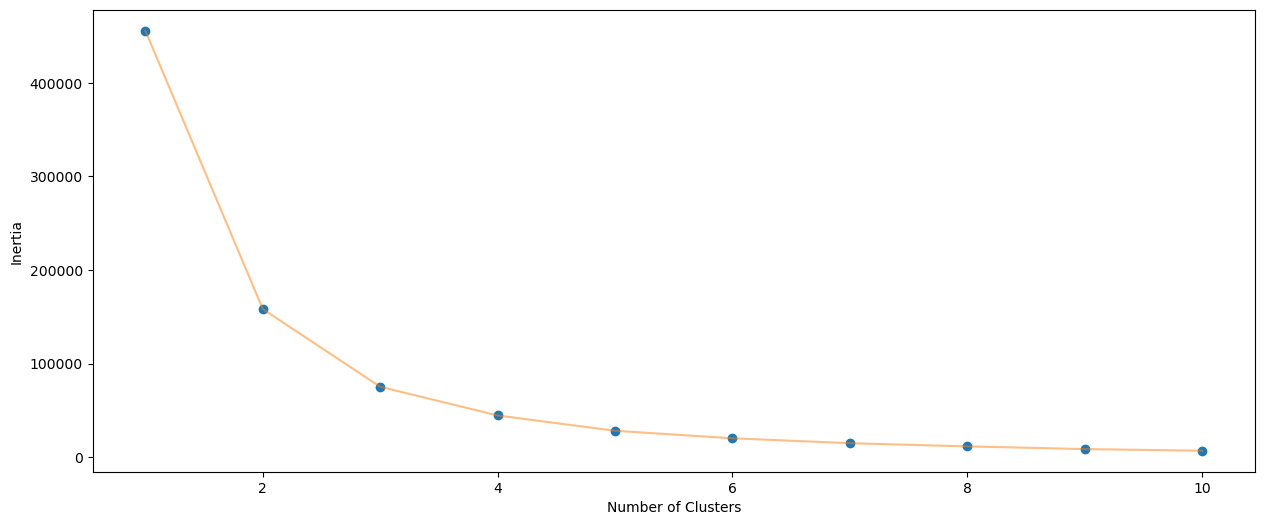

In [36]:
X4 = df[['Movie_Rating', 'ReleaseYear']].iloc[: , :].values
inertia = []
for n in range(1 , 11):
    algorithm = (KMeans(n_clusters = n, init='k-means++', n_init = 10, max_iter=300,
                        tol=0.0001,  random_state= 111, algorithm='lloyd') )
    algorithm.fit(X4)
    inertia.append(algorithm.inertia_)

plt.figure(1, figsize = (15, 6))
plt.plot(np.arange(1, 11), inertia, 'o')
plt.plot(np.arange(1, 11), inertia, '-', alpha = 0.5)
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

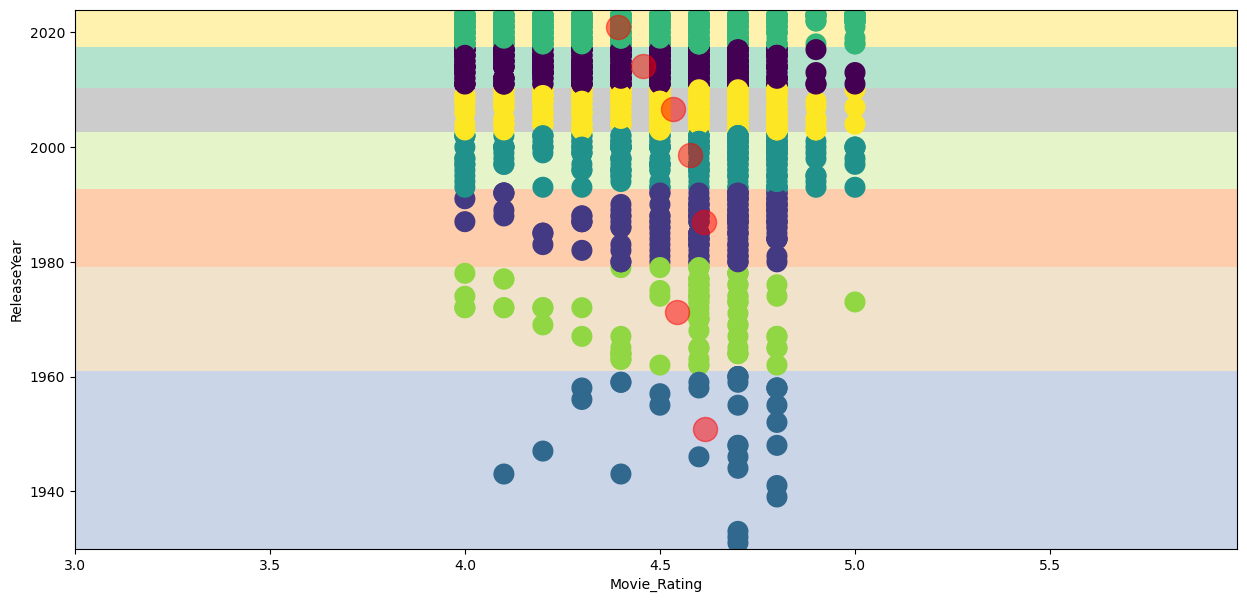

In [37]:
algorithm = (KMeans(n_clusters = 7, init='k-means++', n_init = 10, max_iter = 300,
                        tol=0.0001,  random_state= 111, algorithm='elkan') )
algorithm.fit(X4)
labels4 = algorithm.labels_
centroids4 = algorithm.cluster_centers_

h = 0.02
x_min, x_max = X4[:, 0].min() - 1, X4[:, 0].max() + 1
y_min, y_max = X4[:, 1].min() - 1, X4[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z4 = algorithm.predict(np.c_[xx.ravel(), yy.ravel()])

plt.figure(1, figsize = (15, 7))
plt.clf()
Z4 = Z4.reshape(xx.shape)
plt.imshow(Z4, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap = plt.cm.Pastel2, aspect = 'auto', origin='lower')

plt.scatter( x='Movie_Rating', y ='ReleaseYear', data = df, c = labels4, s = 200)
plt.scatter(x = centroids4[: , 0], y = centroids4[: , 1], s = 300, c = 'red', alpha = 0.5)
plt.xlabel('Movie_Rating')
plt.ylabel('ReleaseYear')

plt.show()